In [1]:
# Code for loading data 

import pandas as pd
import numpy as np

i_cols = ['Movie Id', 'Movie Title' ,'Unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movies = pd.read_csv('movies.txt', sep='\t', names=i_cols,
 encoding='utf-8')

print(movies.shape)
movies = np.asarray(movies)
print(movies[0])

i_cols = ['User Id', 'Movie ID' ,'Rating']

ratings = pd.read_csv('data.txt', sep='\t', names=i_cols,
 encoding='utf-8')

print(ratings.shape)
ratings = np.asarray(ratings)
print(ratings[0])

# U's and V's from Daniel's part
U1 = np.loadtxt('U1.txt')
V1 = np.loadtxt('V1.txt')

U2 = np.loadtxt('U2.txt')
V2 = np.loadtxt('V2.txt')

(1682, 21)
[1 'Toy Story (1995)' 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
(100000, 3)
[196 242   3]


In [2]:
# Off the shelf implementation: Surprise library

from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate


def run_surprise():
    # Load the movielens-100k dataset (download it if needed).
    data = Dataset.load_builtin('ml-100k')

    # Use the famous SVD algorithm.
    algo = SVD()

    # Run 5-fold cross-validation and print results.
    cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

    U_surprise = algo.pu
    V_surprise = algo.qi
    
    return U_surprise, V_surprise

U_surprise, V_surprise = run_surprise()

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9360  0.9316  0.9309  0.9397  0.9393  0.9355  0.0037  
MAE (testset)     0.7362  0.7362  0.7332  0.7373  0.7429  0.7372  0.0032  
Fit time          4.16    3.85    3.73    3.97    4.15    3.97    0.17    
Test time         0.20    0.15    0.11    0.11    0.17    0.15    0.03    


In [69]:
# Visualization for matrix factorizations

import matplotlib.pyplot as plt
%matplotlib inline

def visualization(V, inds, name):
    fig = plt.gcf()
    fig.set_size_inches(10, 7)

    # SVD decomposition
    A, S, B = np.linalg.svd(V)
    # Projection
    proj = np.dot(A[:, :2].T, V)
    print(proj.shape)
    proj = np.dot(proj, V.T)
    print(proj.shape)
    
    # Plot only specified movies
    plot_x = []
    plot_y = []
    for i in inds:
        plot_x.append(proj[0, i - 1])
        plot_y.append(proj[1, i - 1])

    # Names of movies
    names = [str(i+1)+": "+movies[np.where(movies[:,0]==inds[i])[0],1][0] for i in range(len(inds))]
    plt.scatter(plot_x, plot_y)
    for i, txt in enumerate(names):
        plt.annotate(txt, (plot_x[i], plot_y[i]))
        
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    fig.suptitle(name)
    plt.xlabel('V dimension 1')
    plt.ylabel('V dimension 2')
    
    plt.show()
    fig.savefig(str(name).replace(" ", "_") + '.jpg')
    plt.clf()
    
def visualization3(V, inds1, inds2, inds3, name):
    fig = plt.gcf()
    fig.set_size_inches(10, 7)

    # SVD decomposition
    A, S, B = np.linalg.svd(V)
    # Projection
    proj = np.dot(A[:, :2].T, V)
    print(proj.shape)
    proj = np.dot(proj, V.T)
    print(proj.shape)
    
    # Plot only specified movies
    plot_x = []
    plot_y = []
    for i in inds1:
        plot_x.append(proj[0, i - 1])
        plot_y.append(proj[1, i - 1])

    # Names of movies
    names = [str(i+1)+": "+movies[np.where(movies[:,0]==inds1[i])[0],1][0] for i in range(len(inds1))]
    plt.scatter(plot_x, plot_y)
#     for i, txt in enumerate(names):
#         plt.annotate(txt, (plot_x[i], plot_y[i]))
        
    # Plot only specified movies
    plot_x = []
    plot_y = []
    for i in inds2:
        plot_x.append(proj[0, i - 1])
        plot_y.append(proj[1, i - 1])

    # Names of movies
    names = [str(i+1)+": "+movies[np.where(movies[:,0]==inds2[i])[0],1][0] for i in range(len(inds2))]
    plt.scatter(plot_x, plot_y)
#     for i, txt in enumerate(names):
#         plt.annotate(txt, (plot_x[i], plot_y[i]))
        
    # Plot only specified movies
    plot_x = []
    plot_y = []
    for i in inds3:
        plot_x.append(proj[0, i - 1])
        plot_y.append(proj[1, i - 1])

    # Names of movies
    names = [str(i+1)+": "+movies[np.where(movies[:,0]==inds3[i])[0],1][0] for i in range(len(inds3))]
    plt.scatter(plot_x, plot_y)
#     for i, txt in enumerate(names):
#         plt.annotate(txt, (plot_x[i], plot_y[i]))
        
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    fig.suptitle(name)
    plt.xlabel('V dimension 1')
    plt.ylabel('V dimension 2')
    
    plt.show()
    fig.savefig(str(name).replace(" ", "_") + '.jpg')
    plt.clf()
    


(2, 20)
(2, 1682)
(2, 20)
(2, 1682)
(2, 20)
(2, 1682)
(2, 20)
(2, 1682)
(2, 20)
(2, 1682)
(2, 20)
(2, 1682)


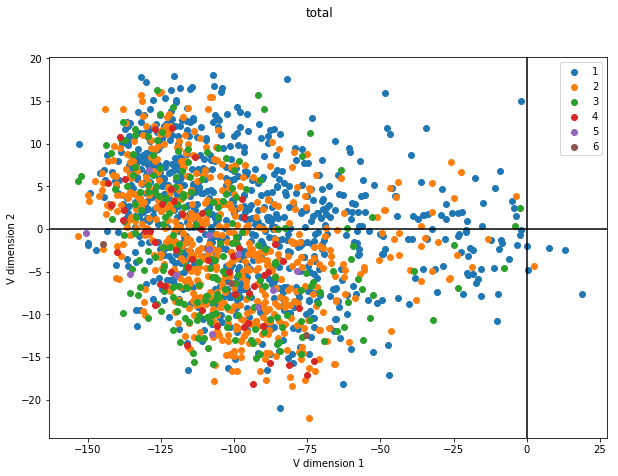

<Figure size 432x288 with 0 Axes>

In [94]:
from matplotlib import rc
from collections import Counter

# My choice movies
def my_choice():
    # By movie id: Titanic, Schindler's List, Men in Black, 101 Dalmations, Jaws, Breakfast at Tiffany's
    # Sleepless in Seattle, Blade Runner, The Godfather, Vertigo
    top_ten=np.asarray([313, 318, 257, 225, 234, 131, 88, 89, 127, 479])

    visualization(V1, top_ten, "Choice")
    visualization(V2, top_ten, "Choice Bias")
    visualization(V_surprise, top_ten, "Choice Surprise")


# Top ten most popular movies
def most_popular():
    movie_ids = ratings[:, 1]
    counter = Counter(movie_ids)
    # top_ten has format: id
    top_ten = []
    for i in counter.most_common(10):
        top_ten.append(i[0])
    top_ten=np.asarray(top_ten)

    visualization(V1, top_ten, "Top Ten")
    visualization(V2, top_ten, "Top Ten Bias")
    visualization(V_surprise, top_ten, "Top Ten Surprise")


# Top ten highest rated
def best_rated():
    sums = []
    for i in range(len(movies)):
        sums.append([movies[i][0], 0, 0])
    for i in range (100000):
        sums[[row[0] for row in sums].index(ratings[i][1])][1]+=ratings[i][2]
        sums[[row[0] for row in sums].index(ratings[i][1])][2]+=1
    sums = [row for row in sums if row[2]>20]
    avgs = [[sums[i][0], sums[i][1]/sums[i][2]] for i in range(len(sums))]
    avgs = np.array(avgs)
    top_ten_ind = np.argpartition(avgs[:,1], -10)[-10:]

    visualization(V1, top_ten_ind, "Best Rating")
    visualization(V2, top_ten_ind, "Best Rating Bias")
    visualization(V_surprise, top_ten_ind, "Best Rating Surprise")
    
def action_genre():
    action_movies = []
    for i in range(len(movies)):
        if movies[i][3] == 1:
            action_movies.append(movies[i, 0])
    action_movies = np.asarray(action_movies)
    
    visualization(V1, action_movies[:10], "Action")
    visualization(V2, action_movies[:10], "Action Bias")
    visualization(V_surprise, action_movies[:10], "Action Surprise")
    
def animation_genre():
    animation_movies = []
    for i in range(len(movies)):
        if movies[i][5] == 1:
            animation_movies.append(movies[i, 0])
    animation_movies = np.asarray(animation_movies)
    
    visualization(V1, animation_movies[:10], "Animation")
    visualization(V2, animation_movies[:10], "Animation Bias")
    visualization(V_surprise, animation_movies[:10], "Animation Surprise")
    
def documentary_genre():
    documentary_movies = []
    for i in range(len(movies)):
        if movies[i][9] == 1:
            documentary_movies.append(movies[i, 0])
    documentary_movies = np.asarray(documentary_movies)
    
    visualization(V1, documentary_movies[:10], "Documentary")
    visualization(V2, documentary_movies[:10], "Documentary Bias")
    visualization(V_surprise, documentary_movies[:10], "Documentary Surprise")
    

def all_genre():
    for i in range(len(movies)):
        if movies[i][9] == 1 and movies[i][5] == 0 and movies[i][3] == 0:
            documentary_movies.append(movies[i, 0])
    documentary_movies = np.asarray(documentary_movies)
    
    animation_movies = []
    for i in range(len(movies)):
        if movies[i][5] == 1 and movies[i][9] == 0 and movies[i][3] == 0:
            animation_movies.append(movies[i, 0])
    animation_movies = np.asarray(animation_movies)
    
    action_movies = []
    for i in range(len(movies)):
        if movies[i][3] == 1 and movies[i][9] == 0 and movies[i][5] == 0:
            action_movies.append(movies[i, 0])
    action_movies = np.asarray(action_movies)
    
    visualization3(V1, action_movies,  animation_movies, documentary_movies, "All")
    visualization3(V2, action_movies, animation_movies, documentary_movies, "All Bias")
    visualization3(V_surprise, action_movies, animation_movies, documentary_movies, "All Surprise")
    

def visualization_t(V, inds, name, fig):
    # SVD decomposition
    A, S, B = np.linalg.svd(V)
    # Projection
    proj = np.dot(A[:, :2].T, V)
    print(proj.shape)
    proj = np.dot(proj, V.T)
    print(proj.shape)
    
    # Plot only specified movies
    plot_x = []
    plot_y = []
    for i in inds:
        if i < len(proj[0]):
            plot_x.append(proj[0, i - 1])
            plot_y.append(proj[1, i - 1])

    # Names of movies
    names = [str(i+1)+": "+movies[np.where(movies[:,0]==inds[i])[0],1][0] for i in range(len(inds))]
    plt.scatter(plot_x, plot_y, label=name)
#     for i, txt in enumerate(names):
#         plt.annotate(txt, (plot_x[i], plot_y[i]))
        
    

def count_genre():
    name = 'total'
    total_movies = []
    for i in range(18):
        total_movies.append([])
        
    for i in range(len(movies)):
        index = np.count_nonzero(movies[i][2:])
        total_movies[index].append((movies[i, 0]))
    
    total_movies = np.asarray(total_movies)
    
    fig = plt.gcf()
    fig.set_size_inches(10, 7)
    for i in range(len(total_movies)):
        if len(total_movies[i]) > 0:
            visualization_t(V1, total_movies[i], str(i), fig)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    fig.suptitle(name)
    plt.xlabel('V dimension 1')
    plt.ylabel('V dimension 2')
    plt.legend()
    
    plt.show()
    fig.savefig(str(name).replace(" ", "_") + '.jpg')
    plt.clf()
    
    
    
# my_choice()
# most_popular()
# best_rated()
# action_genre()
# animation_genre()
# documentary_genre()
# all_genre()
count_genre()
            

best_rated()

(2, 20)
(2, 1682)


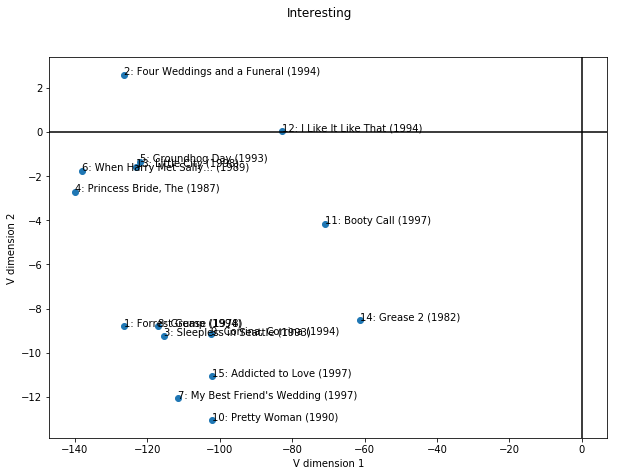

(2, 20)
(2, 1682)


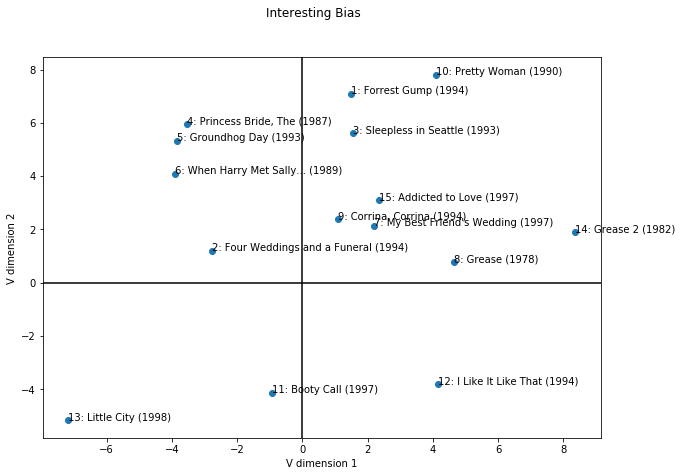

(2, 100)
(2, 1651)


IndexError: index 1655 is out of bounds for axis 1 with size 1651

<Figure size 720x504 with 0 Axes>

In [50]:
# Piazza post: special visualization

arr = [69, 70, 88, 173, 202, 216, 255, 451, 731, 739, 948, 1424, 1656, 1037, 535]
visualization(V1, arr, "Interesting")
visualization(V2, arr, "Interesting Bias")
visualization(V_surprise, arr, "Interesting Surprise")

(3, 20)
(3, 1682)
(15,)
(15,)
(15,)


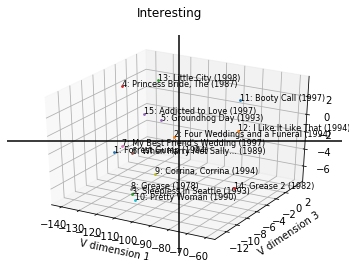

<Figure size 432x288 with 0 Axes>

In [61]:
from mpl_toolkits.mplot3d import Axes3D

def visualization3d(V, inds, name):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # SVD decomposition
    A, S, B = np.linalg.svd(V)
    # Projection
    proj = np.dot(A[:, :3].T, V)
    print(proj.shape)
    proj = np.dot(proj, V.T)
    print(proj.shape)
    
    # Plot only specified movies
    plot_x = []
    plot_y = []
    plot_z = []
    for i in inds:
        plot_x.append(proj[0, i - 1])
        plot_y.append(proj[1, i - 1])
        plot_z.append(proj[2, i - 1])
    
    plot_x = np.asarray(plot_x)
    plot_y = np.asarray(plot_y)
    plot_z = np.asarray(plot_z)
    
    print(plot_x.shape)
    print(plot_y.shape)
    print(plot_z.shape)
    # Names of movies
    names = [str(i+1)+": "+movies[np.where(movies[:,0]==inds[i])[0],1][0] for i in range(len(inds))]
    
    for i, txt in enumerate(names):
        ax.scatter(plot_x[i], plot_y[i], plot_z[i], s=3)
        ax.text(plot_x[i], plot_y[i], plot_z[i], names[i], size=8, zorder=1,  color='k') 
        
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    fig.suptitle(name)
    ax.set_xlabel('V dimension 1')
    ax.set_ylabel('V dimension 2')
    ax.set_ylabel('V dimension 3')
    
    plt.show()
    fig.savefig(str(name).replace(" ", "_") + '.jpg')
    plt.clf()


arr = np.asarray([69, 70, 88, 173, 202, 216, 255, 451, 731, 739, 948, 1424, 1656, 1037, 535])
visualization3d(V1, arr, "Interesting")